# Making some nice plots

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import pymc3 as pm
import theano.tensor as tt
import exoplanet as xo

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [3]:
clusters = pd.read_csv("../data/dbf12.csv")
bench = pd.read_csv("../data/Gyro_Benchmark-Field_Stars.csv")
bench = bench.iloc[bench.Age.values > 0.]
k = pd.read_csv("../data/mcquillan_kinematic_ages.csv")
k_lucy = pd.read_csv("../data/Gyrokinage2020_Prot.csv")
kl = pd.DataFrame(dict({"kepid": k_lucy.kepid.values,
                        "kin_age_lucy": k_lucy.kin_age.values,
                        "kin_age_err": k_lucy.kin_age_err.values}))
k = pd.merge(k, kl, on="kepid", how="left")

# Remove subgiants and photometric binaries
kin = k.iloc[k.flag.values == 1]
subs = (kin.bprp_dered.values < 1.5) & (kin.kinematic_age.values > 6)
kin = kin.iloc[~subs]

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, '$\\mathrm{P_{rot}~[days]}$')

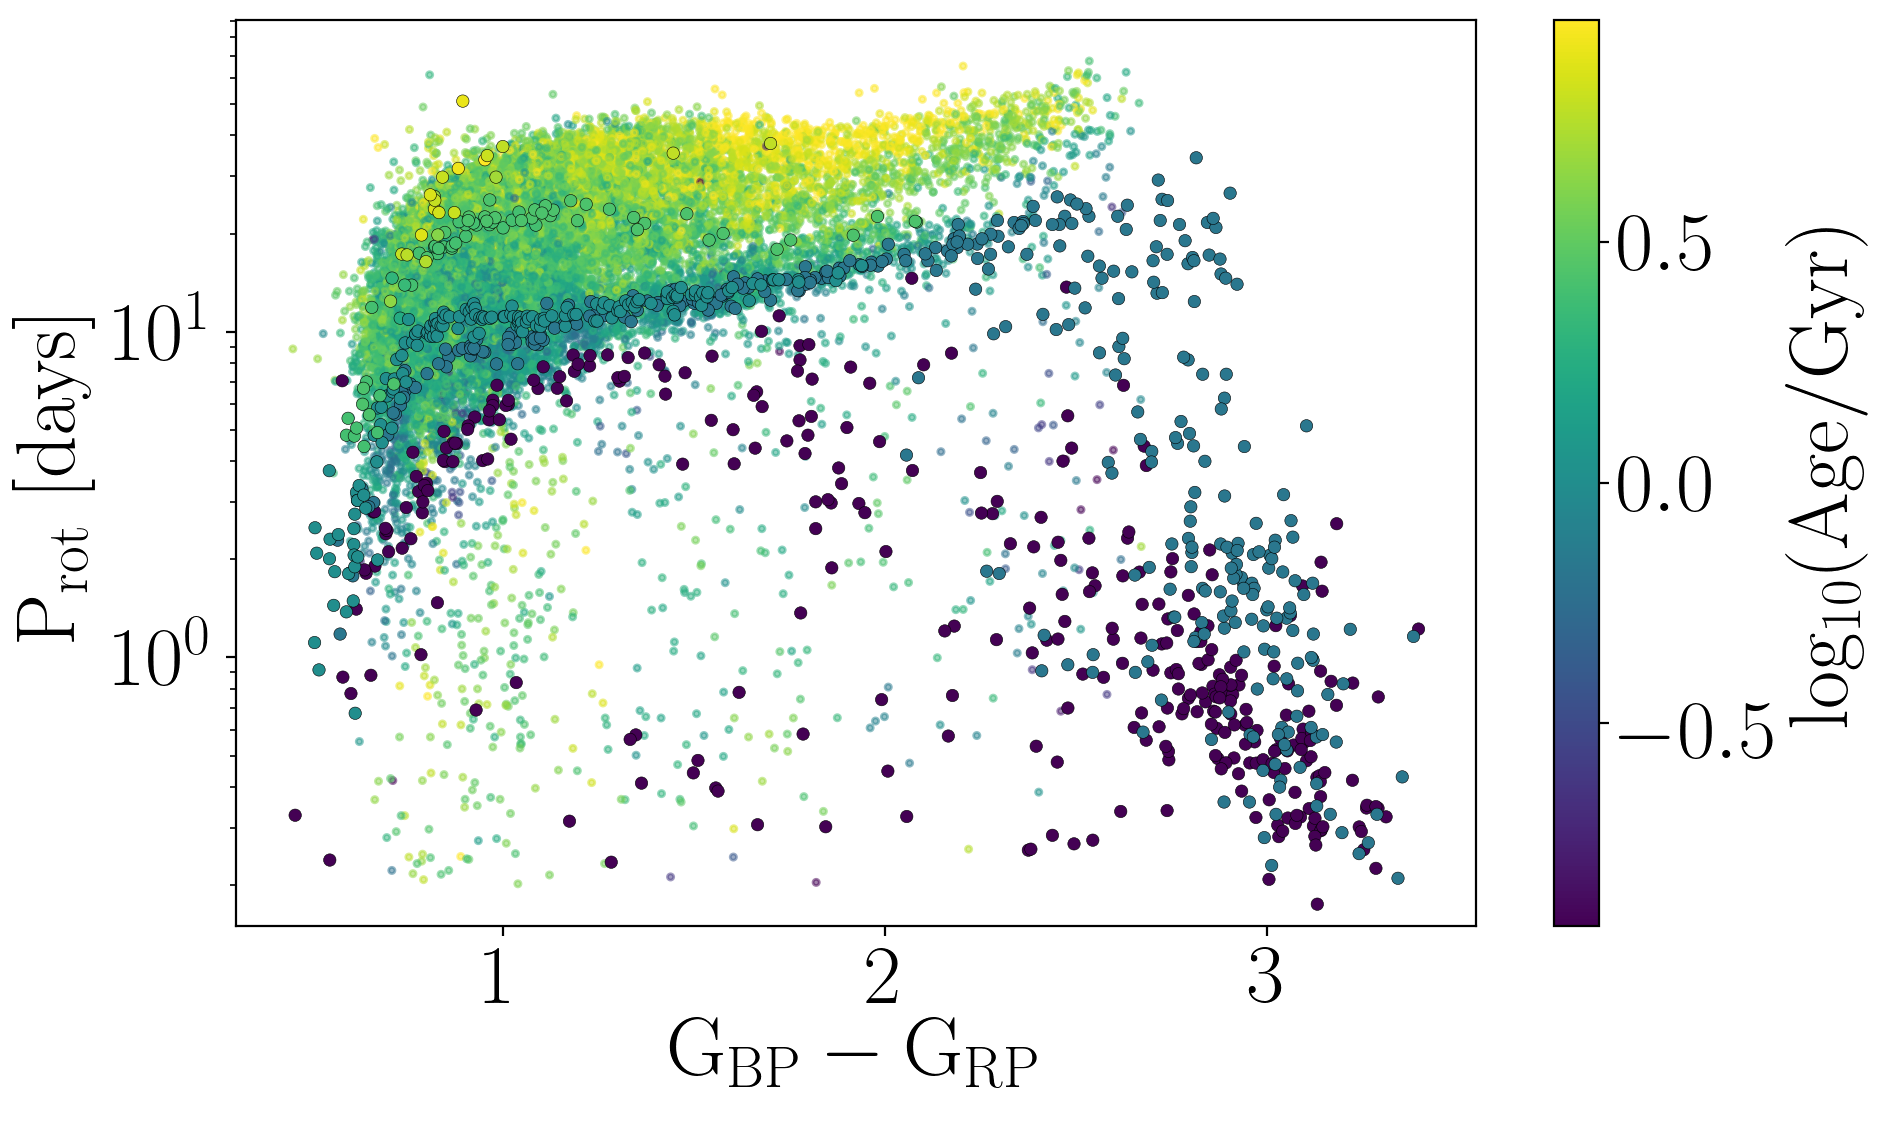

In [4]:
fig = plt.figure(figsize=(10, 6), dpi=200)
vmin, vmax = np.log10(min(clusters.age_gyr)), np.log10(max(bench.Age))
plt.scatter(kin.bprp_dered, kin.Prot, c=np.log10(kin.kin_age_lucy),  #kinematic_age),
           s=5, alpha=.5, vmin=vmin, vmax=vmax)
plt.scatter(clusters["(BP-RP)0"], clusters.prot, c=np.log10(clusters.age_gyr),
            s=20, vmin=vmin, vmax=vmax, edgecolor="k", lw=.2)
plt.scatter(bench["BP-RP"], bench.Prot, c=np.log10(bench.Age),
            s=20, vmin=vmin, vmax=vmax, edgecolor="k", lw=.2)
plt.yscale("log")
plt.colorbar(label="$\mathrm{log_{10}(Age/Gyr)}$")
plt.xlabel("$\mathrm{G_{BP} - G_{RP}}$")
plt.ylabel("$\mathrm{P_{rot}~[days]}$")

In [7]:
print(clusters.keys())

Index(['cluster_name', 'age_gyr', 'reddening', 'source_id', 'epic_or_kic',
       'ra', 'dec', 'BP-RP', '(BP-RP)0', 'Gmag', 'MGmag', 'teff', 'prot'],
      dtype='object')


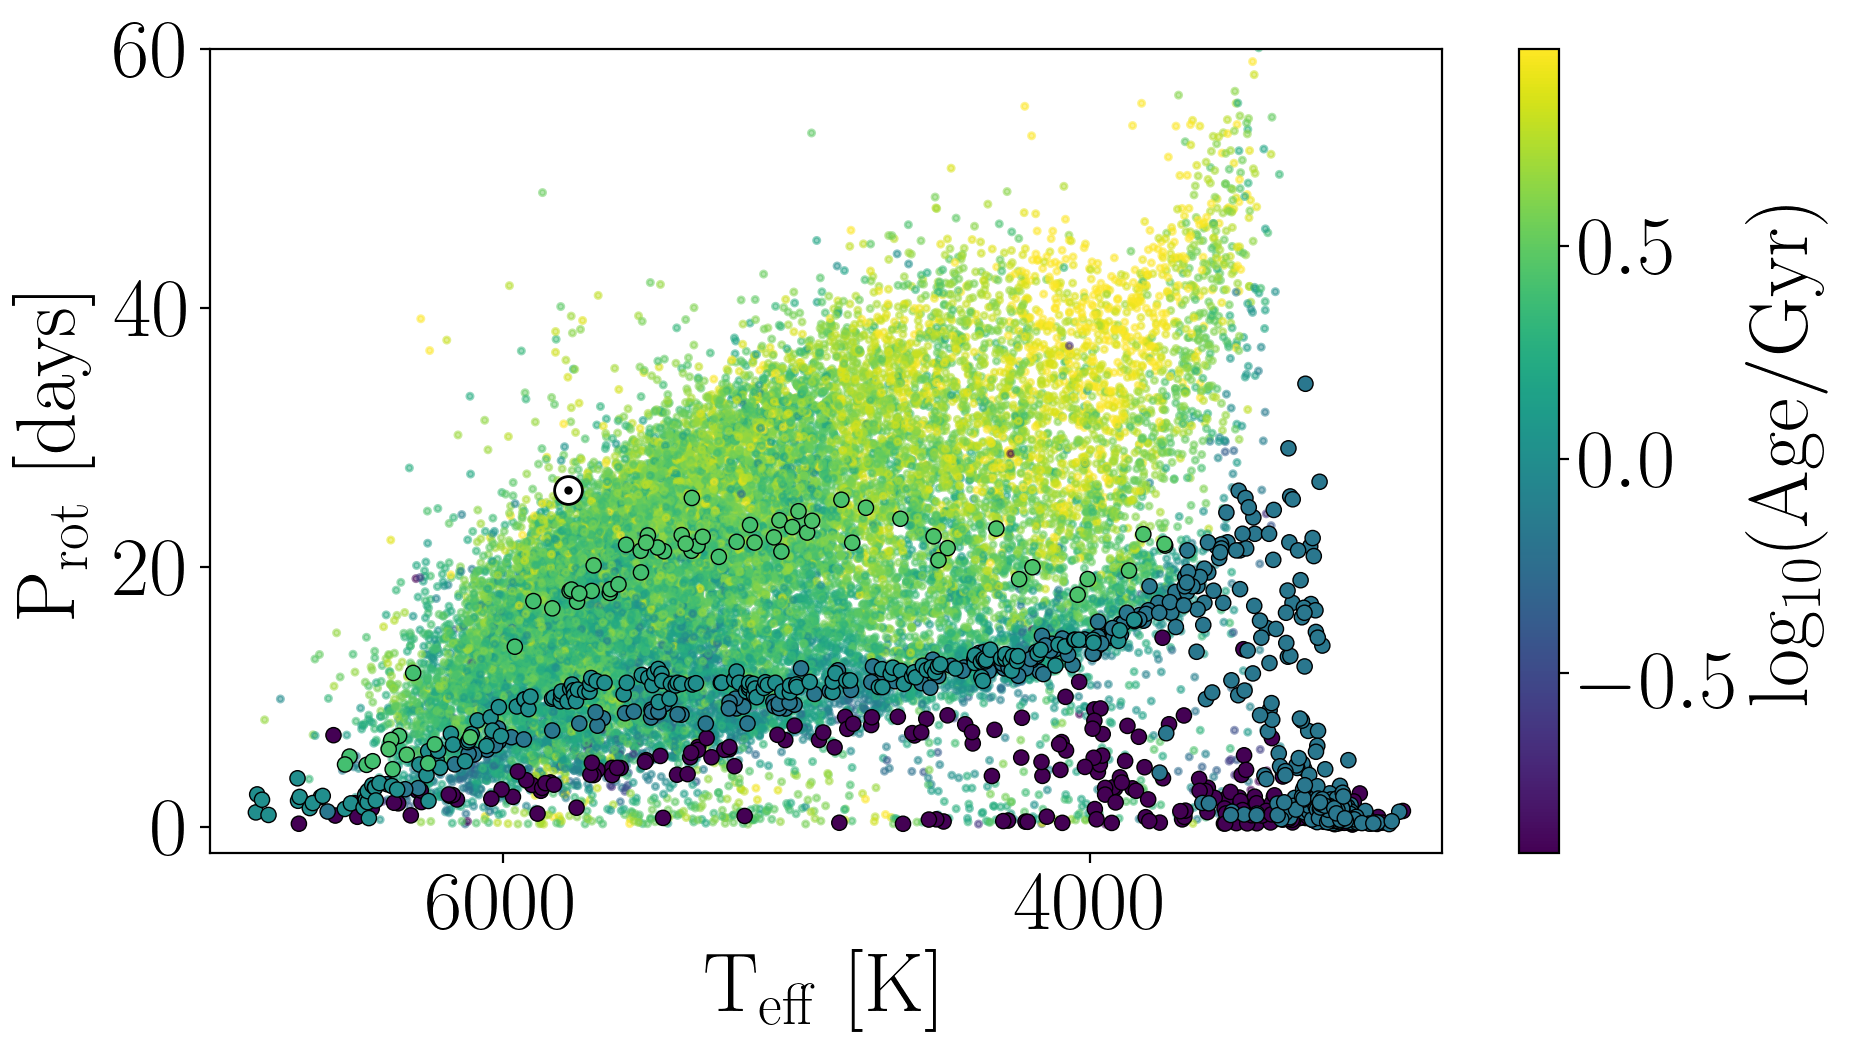

In [24]:
fig = plt.figure(figsize=(10, 6), dpi=200)
vmin, vmax = np.log10(min(clusters.age_gyr)), np.log10(max(bench.Age))
plt.scatter(kin.color_teffs, kin.Prot, c=np.log10(kin.kin_age_lucy),  #kinematic_age),
           s=5, alpha=.5, vmin=vmin, vmax=vmax)
plt.scatter(clusters["teff"], clusters.prot, c=np.log10(clusters.age_gyr),
            s=30, vmin=vmin, vmax=vmax, edgecolor="k", lw=.5)
# plt.scatter(bench["Teff_1"], bench.Prot, c=np.log10(bench.Age),
#             s=20, vmin=vmin, vmax=vmax, edgecolor="k", lw=.2)
# plt.yscale("log")
plt.plot(5778, 26, "wo", mec="k", ms=10)
plt.plot(5778, 26, "k.", ms=4)
plt.colorbar(label="$\mathrm{log_{10}(Age/Gyr)}$")
plt.xlabel("$\mathrm{T_{eff}~[K]}$")
plt.ylabel("$\mathrm{P_{rot}~[days]}$")
plt.xlim(7000, 2800);
plt.ylim(-2, 60)
plt.tight_layout()
plt.savefig("../plots/kin_and_clusters")
plt.savefig("../plots/kin_and_clusters.pdf")